In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as mpatches

In [2]:
dataset_musica = pd.read_csv('https://raw.githubusercontent.com/guimedeirosf/ml-song-popular/main/Dataset/dataset.csv',  index_col=0)
dataset_musica.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [3]:
dataset_musica.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114000 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          114000 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        114000 non-null  int64  
 5   duration_ms       114000 non-null  int64  
 6   explicit          114000 non-null  bool   
 7   danceability      114000 non-null  float64
 8   energy            114000 non-null  float64
 9   key               114000 non-null  int64  
 10  loudness          114000 non-null  float64
 11  mode              114000 non-null  int64  
 12  speechiness       114000 non-null  float64
 13  acousticness      114000 non-null  float64
 14  instrumentalness  114000 non-null  float64
 15  liveness          114000 non-null  float64
 16  valence           11

In [4]:
# Extraindo a descrição dos atributos numéricos
dataset_musica.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [5]:
# visualizando suas dimensões
dataset_musica.shape

(114000, 20)

Análise Exploratória dos Dados

In [6]:
#Quantidade de linhas e colunas
dataset_musica.shape

(114000, 20)

In [7]:
#Linhas não nulas e tipo
dataset_musica.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114000 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          114000 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        114000 non-null  int64  
 5   duration_ms       114000 non-null  int64  
 6   explicit          114000 non-null  bool   
 7   danceability      114000 non-null  float64
 8   energy            114000 non-null  float64
 9   key               114000 non-null  int64  
 10  loudness          114000 non-null  float64
 11  mode              114000 non-null  int64  
 12  speechiness       114000 non-null  float64
 13  acousticness      114000 non-null  float64
 14  instrumentalness  114000 non-null  float64
 15  liveness          114000 non-null  float64
 16  valence           11

Analise Estatísticas 

In [8]:
# visualizando as estatísticas
dataset_musica.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


Artistas únicos

In [9]:
print(dataset_musica['artists'].unique().shape)

(31438,)


Quantidade de músicas por artista

In [10]:
print(dataset_musica['artists'].value_counts())

The Beatles                                                                 279
George Jones                                                                271
Stevie Wonder                                                               236
Linkin Park                                                                 224
Ella Fitzgerald                                                             222
                                                                           ... 
Automatic Tasty                                                               1
o9                                                                            1
Pyotr Ilyich Tchaikovsky;National Philharmonic Orchestra;Richard Bonynge      1
tstewart;Ólafur Arnalds                                                       1
Jesus Culture                                                                 1
Name: artists, Length: 31437, dtype: int64


Valores Ausentes

In [11]:

#numero de linhas
linhas = dataset_musica.shape[0]

#.sort_values(ascending=False) é um método usado para classificar os valores de uma coluna em um DataFrame do pandas em ordem decrescente.
#Quando ascending=False, os valores serão classificados em ordem decrescente.
(dataset_musica.isnull().sum() / linhas).sort_values(ascending=False)

album_name          0.000009
track_name          0.000009
artists             0.000009
track_id            0.000000
speechiness         0.000000
time_signature      0.000000
tempo               0.000000
valence             0.000000
liveness            0.000000
instrumentalness    0.000000
acousticness        0.000000
loudness            0.000000
mode                0.000000
key                 0.000000
energy              0.000000
danceability        0.000000
explicit            0.000000
duration_ms         0.000000
popularity          0.000000
track_genre         0.000000
dtype: float64

In [12]:

#função que gera uma gráfico de barras com colunas e frequência dos dados faltantes.
def missing_visualization(df):
  quant_isnull = df.isnull().sum()
  columns = df.columns
  dic = {"colunas":[],"quant_isnull":[]}
  for coluna,quant in zip(columns,quant_isnull):
    if quant > 0:
      dic["colunas"].append(quant)
      dic["quant_isnull"].append(coluna)
  df = pd.DataFrame(dic)
  plt.figure(figsize=(15,5))
  sns.barplot(x=df["quant_isnull"],y=df["colunas"],data=df, palette="rocket")
  plt.xticks(rotation=45)



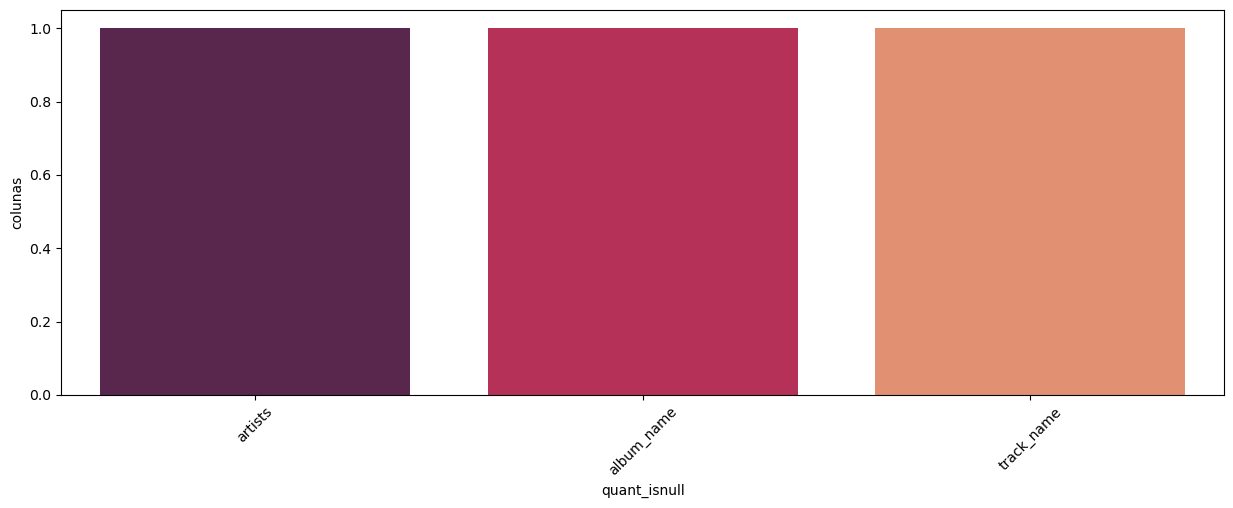

In [13]:
missing_visualization(dataset_musica)

In [14]:

#As 100 músicas mais populares versus todo o conjunto de dados

sorted_df = dataset_musica.sort_values('popularity', ascending = False).head(100)
sorted_df.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
20001,3nqQXoyQOWXiESFLlDF1hG,Sam Smith;Kim Petras,Unholy (feat. Kim Petras),Unholy (feat. Kim Petras),100,156943,False,0.714,0.472,2,-7.375,1,0.0864,0.01300,0.000005,0.266,0.238,131.121,4,dance
81051,3nqQXoyQOWXiESFLlDF1hG,Sam Smith;Kim Petras,Unholy (feat. Kim Petras),Unholy (feat. Kim Petras),100,156943,False,0.714,0.472,2,-7.375,1,0.0864,0.01300,0.000005,0.266,0.238,131.121,4,pop
51664,2tTmW7RDtMQtBk7m2rYeSw,Bizarrap;Quevedo,"Quevedo: Bzrp Music Sessions, Vol. 52","Quevedo: Bzrp Music Sessions, Vol. 52",99,198937,False,0.621,0.782,2,-5.548,1,0.0440,0.01250,0.033000,0.230,0.550,128.033,4,hip-hop
81210,4uUG5RXrOk84mYEfFvj3cK,David Guetta;Bebe Rexha,I'm Good (Blue),I'm Good (Blue),98,175238,True,0.561,0.965,7,-3.673,0,0.0343,0.00383,0.000007,0.371,0.304,128.040,4,pop
89411,5ww2BF9slyYgNOk37BlC4u,Manuel Turizo,La Bachata,La Bachata,98,162637,False,0.835,0.679,7,-5.329,0,0.0364,0.58300,0.000002,0.218,0.850,124.980,4,reggaeton


In [15]:

artistas_popularidade = dataset_musica[['artists', 'popularity']]
artistas_populares = artistas_popularidade.groupby("artists").mean().sort_values(by='popularity', ascending=False).reset_index()

#Trazendo somente os 5 primeiros
artistas_populares = artistas_populares.head()
artistas_populares

,artists,popularity
0,Sam Smith;Kim Petras,100.0
1,Bizarrap;Quevedo,99.0
2,Manuel Turizo,98.0
3,Bad Bunny;Chencho Corleone,97.0
4,Bad Bunny;Bomba Estéreo,94.5


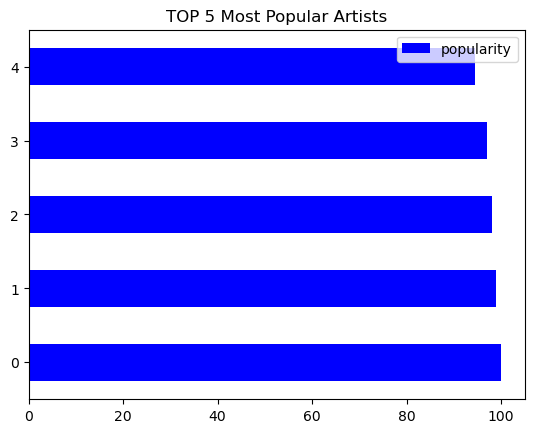

In [18]:

artistas_populares.plot.barh(color="blue") ##visualize the data
plt.title("TOP 5 Most Popular Artists")
plt.show()

In [19]:
# 5 musicas mais longas

long_songs = dataset_musica[["track_name", "duration_ms"]].sort_values(by="duration_ms", ascending=False)[:5]
long_songs

,track_name,duration_ms
73617,Unity (Voyage Mix) Pt. 1,5237295
10984,Crossing Wires 002 - Continuous DJ Mix,4789026
10935,Crossing Wires 002 - Continuous DJ Mix,4789026
24348,The Lab 03 - Continuous DJ Mix Part 1,4730302
73840,Amnesia Ibiza Underground 10 DJ Mix,4563897


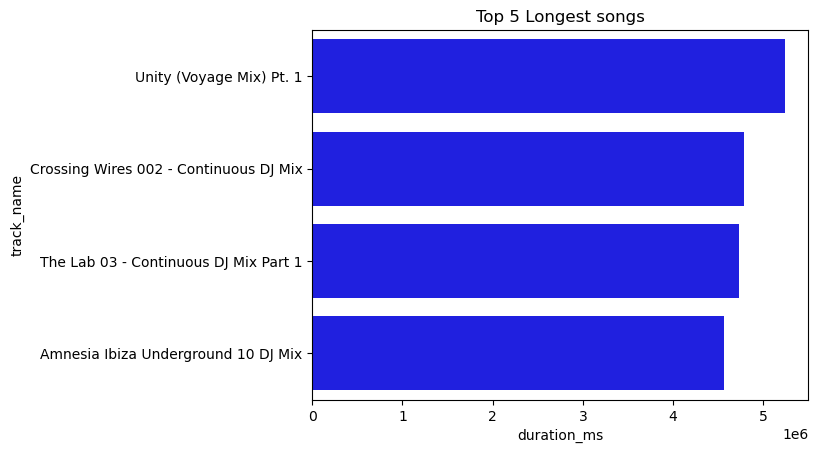

In [20]:
sns.barplot(x="duration_ms", y="track_name", data= long_songs, color = 'blue')
plt.title("Top 5 Longest songs")
plt.show()

In [21]:


trend_genre = dataset_musica[["track_genre", "popularity"]].sort_values(by="popularity", ascending=False)[:5]
trend_genre
     

,track_genre,popularity
20001,dance,100
81051,pop,100
51664,hip-hop,99
81210,pop,98
89411,reggaeton,98


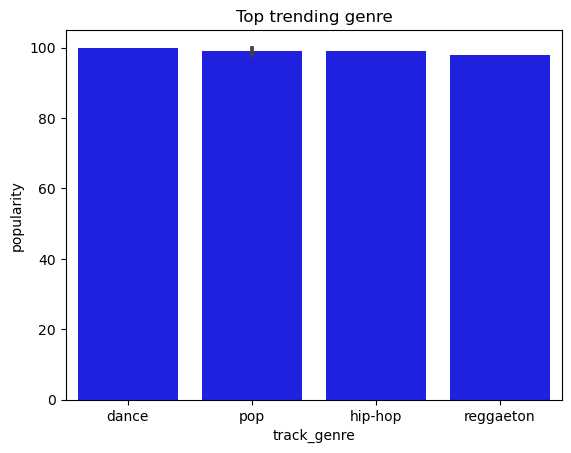

In [22]:

sns.barplot(x="track_genre",y="popularity", data=trend_genre, color = 'blue')
plt.title("Top trending genre")
plt.show()

In [31]:

danceable = dataset_musica[["track_name", "artists", "danceability"]].sort_values(by="danceability", ascending=False)[:5]
danceable
     



,track_name,artists,danceability
111635,Sol Clap,Quantic,0.985
66576,Medicaid Baby,That Girl Lay Lay,0.984
24916,Inspiration,Delano Smith,0.983
73374,Daily Routines,Oliver Schories,0.982
66793,"Featuring Mixx Master Lee, Red Rum & J. Smoov ...",Mixx Master Lee,0.981


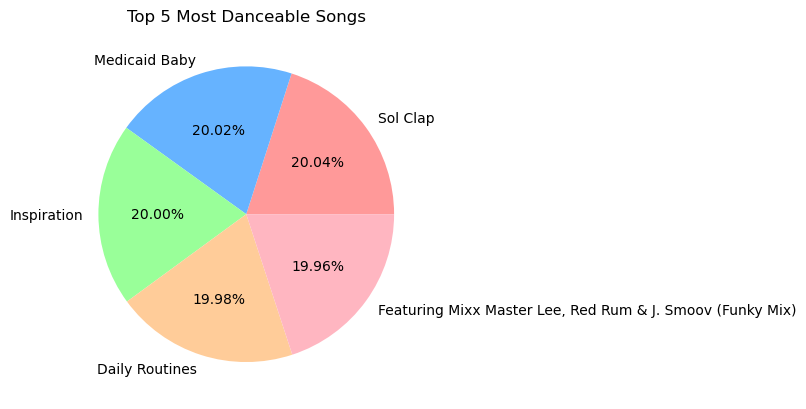

In [32]:
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', '#ffb6c1']

plt.pie(x="danceability", data=danceable, autopct='%1.2f%%', labels=danceable.track_name, colors = colors)
plt.title("Top 5 Most Danceable Songs")
plt.show()

In [33]:
#Encontrando correlação entre as variáveis

dataset_musica.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [35]:
corr_table = dataset_musica.corr(method="pearson") #get variables the correlation


C:\Users\Medeiros\AppData\Local\Temp\ipykernel_23588\1290460273.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_table = dataset_musica.corr(method="pearson") #get variables the correlation


In [36]:
corr_table

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
popularity,1.000000,-0.007101,0.044082,0.035448,0.001056,-0.003853,0.050423,-0.013931,-0.044927,-0.025472,-0.095139,-0.005387,-0.040534,0.013205,0.031073
duration_ms,-0.007101,1.000000,-0.065263,-0.073426,0.058523,0.008114,-0.003470,-0.035556,-0.062600,-0.103788,0.124371,0.010321,-0.154479,0.024346,0.018225
explicit,0.044082,-0.065263,1.000000,0.122507,0.096955,0.004484,0.108588,-0.037212,0.307952,-0.094403,-0.103404,0.032549,-0.003381,-0.002816,0.038386
danceability,0.035448,-0.073426,0.122507,1.000000,0.134325,0.036469,0.259077,-0.069219,0.108626,-0.171533,-0.185606,-0.131617,0.477341,-0.050450,0.207218
energy,0.001056,0.058523,0.096955,0.134325,1.000000,0.048006,0.761690,-0.078362,0.142509,-0.733906,-0.181879,0.184796,0.258934,0.247851,0.187126
key,-0.003853,0.008114,0.004484,0.036469,0.048006,1.000000,0.038590,-0.135916,0.020418,-0.040937,-0.006823,-0.001600,0.034103,0.010917,0.015065
loudness,0.050423,-0.003470,0.108588,0.259077,0.761690,0.038590,1.000000,-0.041764,0.060826,-0.589803,-0.433477,0.076899,0.279848,0.212446,0.191992
mode,-0.013931,-0.035556,-0.037212,-0.069219,-0.078362,-0.135916,-0.041764,1.000000,-0.046532,0.095553,-0.049955,0.014012,0.021953,0.000566,-0.024092
speechiness,-0.044927,-0.062600,0.307952,0.108626,0.142509,0.020418,0.060826,-0.046532,1.000000,-0.002186,-0.089616,0.205219,0.036635,0.017273,-0.000011
acousticness,-0.025472,-0.103788,-0.094403,-0.171533,-0.733906,-0.040937,-0.589803,0.095553,-0.002186,1.000000,0.104027,-0.020700,-0.107070,-0.208224,-0.176138


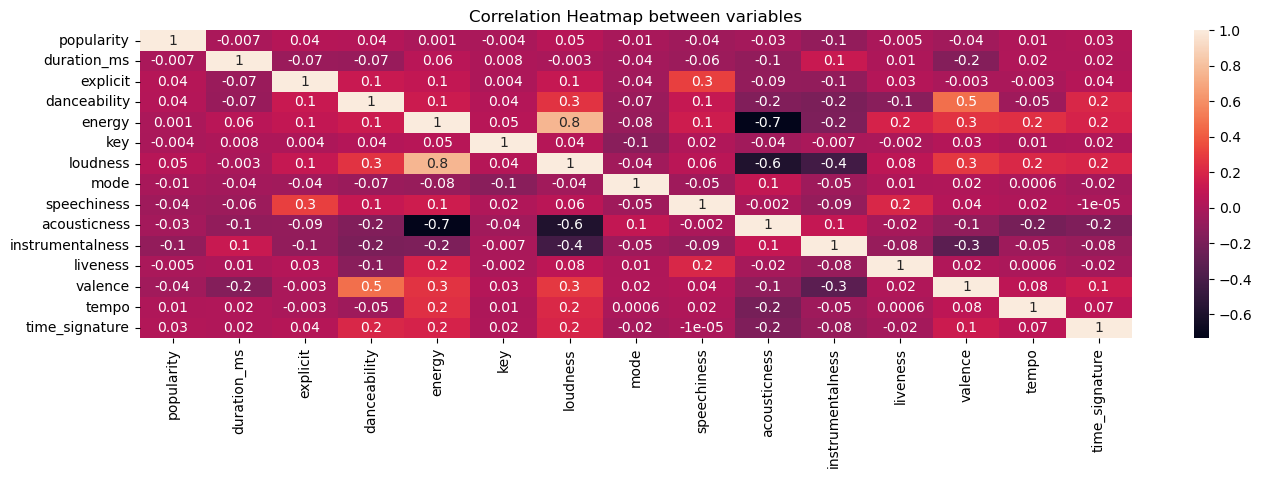

In [37]:

#Plotando a tabela de correlação usando o Seaborn.
plt.figure(figsize=(16,4))
sns.heatmap(corr_table, annot=True, fmt=".1g")
plt.title("Correlation Heatmap between variables")
plt.show() #mostrando o plot

Tratando o Dataset

In [39]:
#Removendo itens duplicados

dados_musicas = dataset_musica.drop_duplicates()
dados_musicas.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [40]:

# Criando classes de popularidade
dados_musicas[dados_musicas["popularity"] >=80]

conditionlist = [
    (dados_musicas['popularity'] >= 80) ,
    (dados_musicas['popularity'] <80)]

choicelist = [1,0]
dados_musicas['pop_classe'] = np.select(conditionlist, choicelist, default='Not Specified')
dados_musicas['pop_classe'] = dados_musicas['pop_classe'].astype(int)

C:\Users\Medeiros\AppData\Local\Temp\ipykernel_23588\3337598264.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_musicas['pop_classe'] = np.select(conditionlist, choicelist, default='Not Specified')
C:\Users\Medeiros\AppData\Local\Temp\ipykernel_23588\3337598264.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_musicas['pop_classe'] = dados_musicas['pop_classe'].astype(int)


In [41]:
#removendo valores nulos
dados_musicas = dados_musicas.dropna()

In [42]:
dados_musicas.columns

Index(['track_id', 'artists', 'album_name', 'track_name', 'popularity',
       'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre', 'pop_classe'],
      dtype='object')

In [43]:
#Removendo a coluna que não irei mais usar
dados_musicas = dados_musicas.drop(columns=['popularity'])

In [57]:
dados_musicas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113549 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          113549 non-null  object 
 1   artists           113549 non-null  object 
 2   album_name        113549 non-null  object 
 3   track_name        113549 non-null  object 
 4   duration_ms       113549 non-null  int64  
 5   explicit          113549 non-null  bool   
 6   danceability      113549 non-null  float64
 7   energy            113549 non-null  float64
 8   key               113549 non-null  int64  
 9   loudness          113549 non-null  float64
 10  mode              113549 non-null  int64  
 11  speechiness       113549 non-null  float64
 12  acousticness      113549 non-null  float64
 13  instrumentalness  113549 non-null  float64
 14  liveness          113549 non-null  float64
 15  valence           113549 non-null  float64
 16  tempo             11

In [58]:

#Mantendo somente colunas quantitativas e que são importantes para o modelo

df_quantitative = dados_musicas
cols_to_drop = []
for column in dados_musicas:
    if dados_musicas[column].dtype == 'object':
        cols_to_drop.append(column)
df_quantitative = dados_musicas.drop(columns=cols_to_drop)

print(f"Tamanho do dataset que vamos trabalhar: {df_quantitative.shape}")

Tamanho do dataset que vamos trabalhar: (113549, 15)


In [60]:
df_quantitative.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113549 entries, 0 to 113999
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   duration_ms       113549 non-null  int64  
 1   explicit          113549 non-null  bool   
 2   danceability      113549 non-null  float64
 3   energy            113549 non-null  float64
 4   key               113549 non-null  int64  
 5   loudness          113549 non-null  float64
 6   mode              113549 non-null  int64  
 7   speechiness       113549 non-null  float64
 8   acousticness      113549 non-null  float64
 9   instrumentalness  113549 non-null  float64
 10  liveness          113549 non-null  float64
 11  valence           113549 non-null  float64
 12  tempo             113549 non-null  float64
 13  time_signature    113549 non-null  int64  
 14  pop_classe        113549 non-null  int32  
dtypes: bool(1), float64(9), int32(1), int64(4)
memory usage: 12.7 MB


In [61]:
df_quantitative.head()


,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,pop_classe
0,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,0
1,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,0
2,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,0
3,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,0
4,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,1


In [62]:
df_quantitative = df_quantitative.drop(columns=['explicit'])
df_quantitative.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113549 entries, 0 to 113999
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   duration_ms       113549 non-null  int64  
 1   danceability      113549 non-null  float64
 2   energy            113549 non-null  float64
 3   key               113549 non-null  int64  
 4   loudness          113549 non-null  float64
 5   mode              113549 non-null  int64  
 6   speechiness       113549 non-null  float64
 7   acousticness      113549 non-null  float64
 8   instrumentalness  113549 non-null  float64
 9   liveness          113549 non-null  float64
 10  valence           113549 non-null  float64
 11  tempo             113549 non-null  float64
 12  time_signature    113549 non-null  int64  
 13  pop_classe        113549 non-null  int32  
dtypes: float64(9), int32(1), int64(4)
memory usage: 12.6 MB


In [63]:
# Normalizando os dados, deixando na mesma escala
df_quantitative_nm=(df_quantitative-df_quantitative.min())/(df_quantitative.max()-df_quantitative.min())

In [64]:
df_quantitative_nm.head()

,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,pop_classe
0,0.042473,0.686294,0.4610,0.090909,0.791392,0.0,0.148187,0.032329,0.000001,0.3580,0.718593,0.361245,0.8,0.0
1,0.026971,0.426396,0.1660,0.090909,0.597377,1.0,0.079067,0.927711,0.000006,0.1010,0.268342,0.318397,0.8,0.0
2,0.038679,0.444670,0.3590,0.000000,0.736123,1.0,0.057720,0.210843,0.000000,0.1170,0.120603,0.313643,0.8,0.0
3,0.036978,0.270051,0.0596,0.000000,0.573701,1.0,0.037617,0.908635,0.000071,0.1320,0.143719,0.746758,0.6,0.0
4,0.036389,0.627411,0.4430,0.181818,0.737103,1.0,0.054508,0.470884,0.000000,0.0829,0.167839,0.492863,0.8,1.0


Inicio do Treinamento e Testes

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

In [67]:
# Separando os dados para treino e teste
df_train, df_test = train_test_split(df_quantitative_nm, test_size=0.3, random_state=42, shuffle=True)

In [68]:

# visualizando as proporções da variável alvo
df_train.pop_classe.value_counts(normalize=True)

0.0    0.98947
1.0    0.01053
Name: pop_classe, dtype: float64

In [69]:

# visualizando as proporções da variável alvo
df_test.pop_classe.value_counts(normalize=True)

0.0    0.989373
1.0    0.010627
Name: pop_classe, dtype: float64

In [70]:

# dividindo X e y
X = df_train.drop('pop_classe', axis=1)
y = df_train.pop_classe

# separando os dados mantendo a porcentagem de amostras em cada classe
StratifKfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [71]:

# looping para separar os dados em treino e validação
for train_index, val_index in StratifKfold.split(X, y):

    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

In [72]:
# checando as proporções da classe 1 na divisão
print(f'Dimensões: {X_train.shape, X_val.shape, y_train.shape, y_val.shape}\n')
print(f"Proporção do df_train para classe=1: {round(len(df_train[df_train.pop_classe==1]) / df_train.shape[0], 4)}\n")
print(f"Proporção de X_train para classe=1:  {round(len(y_train[y_train==1]) / X_train.shape[0], 4)}")
print(f"Proporção de X_val para classe=1:    {round(len(y_val[y_val==1]) / X_val.shape[0], 4)}")

Dimensões: ((63588, 13), (15896, 13), (63588,), (15896,))

Proporção do df_train para classe=1: 0.0105

Proporção de X_train para classe=1:  0.0105
Proporção de X_val para classe=1:    0.0105
